<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/NN_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml

Data=fetch_openml('mnist_784')

In [0]:
X,y_actual=Data["data"][:1000]/10000,Data["target"][:1000]

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

def show_imag(X,y_actual,position):
  img=X[position]
  imag=img.reshape(int(np.sqrt(img.size)),int(np.sqrt(img.size)))
  plt.imshow(imag,cmap = matplotlib.cm.binary, interpolation="nearest")
  plt.show()
  print(y_actual[position]) 

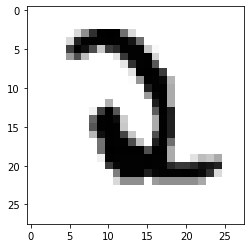

2


In [5]:
show_imag(X,y_actual,400)

In [0]:
def convert_binary(y_actual):
  y1=np.zeros((len(y_actual),10))
  for i in range(len(y_actual)):
    y1[i][int(y_actual[i])]=1
    
    
  return y1

In [0]:
NumHlayers=10
NumHunits=30

In [21]:
y=convert_binary(y_actual)
m,n=np.shape(X)
p,s=np.shape(y)
X_with_bias=np.c_[np.ones((m,1)),X]
hidden=np.ones((NumHlayers,m,NumHunits+1))
z=np.ones((NumHlayers,m,NumHunits))
a=np.ones((NumHlayers,m,NumHunits))
d=np.ones((NumHlayers,m,NumHunits+1))
ITheta=np.random.rand(n+1,NumHunits)
#Igrad=np.zeros((n+1,NumHunits))
HTheta=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
HTGrad=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
HGrad=np.zeros((NumHlayers,NumHunits+1))
ETheta=np.random.rand(NumHunits+1,s)
#EGrad=np.zeros((NumHunits+1,s))
for rota in range(100):
  z[0]=np.matmul(X_with_bias,ITheta)
  a[0]=1/(1+np.exp(-1*z[0]))
  hidden[0]=np.c_[np.ones((m,1)),a[0]]
  for i in range(NumHlayers-1):
    z[i+1]=np.matmul(hidden[i],HTheta[i])
    a[i+1]=1/(1+np.exp(-1*z[i+1]))
    hidden[i+1]=np.c_[np.ones((m,1)),a[i+1]]
  pred=1/(1+np.exp(-1*np.matmul(hidden[i+1],ETheta)))
  cost=sum(((pred-y)**2).transpose()).reshape(-1,1)
  print(sum(cost))
  dpred=pred-y
  #Egrad_init=np.zeros((m,NumHunits+1,s))
  Egrad=np.matmul((hidden[NumHlayers-1].transpose()),(2*dpred)*(pred*(1-pred)))/1000
  HGrad[NumHlayers-1]=sum(np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())).reshape(1,-1)/1000
  for j in range(NumHlayers-1):
    k=NumHlayers-j-2
    HTGrad[k]=np.matmul((sum(hidden[k]).reshape(1,-1)/1000).transpose(),((((sum(a[k+1])/1000).reshape(1,-1))*(((sum(1-a[k+1])/1000).reshape(1,-1))))*(HGrad[k+1,1:NumHunits+1].reshape(1,-1))))
    HGrad[k]=np.matmul(((((sum(a[k+1])/1000).reshape(1,-1))*(((sum(1-a[k+1])/1000).reshape(1,-1))))*(HGrad[k+1,1:NumHunits+1].reshape(1,-1))),HTheta[8].transpose())
  ETheta=ETheta-Egrad*100000000
  HTheta=HTheta-HTGrad*100000000

  
  



[8999.97731859]
[999.97208772]
[1790.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]
[1790.]


In [24]:
pred[802]

array([6.64579066e-25, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.09641866e-26,
       0.00000000e+00, 2.78036661e-35])

In [25]:
y_actual[802]

'6'

In [11]:
(HGrad[9,1:31].reshape(1,-1))

array([[9.86017796e-29, 1.05652890e-28, 9.26309290e-29, 7.80658275e-29,
        7.72948871e-29, 1.00450636e-28, 9.74533257e-29, 8.77114596e-29,
        8.92669567e-29, 8.70021027e-29, 8.34622789e-29, 9.72576055e-29,
        1.07187780e-28, 9.08413266e-29, 7.37238128e-29, 9.16023845e-29,
        8.32982661e-29, 9.66532599e-29, 1.12262313e-28, 9.89351149e-29,
        9.10905077e-29, 1.11891938e-28, 8.16802348e-29, 1.00580597e-28,
        8.71498364e-29, 9.28178591e-29, 9.15524389e-29, 1.01241713e-28,
        1.06967107e-28, 9.47713859e-29]])

In [12]:
HGrad[9]

array([8.84083703e-29, 9.86017796e-29, 1.05652890e-28, 9.26309290e-29,
       7.80658275e-29, 7.72948871e-29, 1.00450636e-28, 9.74533257e-29,
       8.77114596e-29, 8.92669567e-29, 8.70021027e-29, 8.34622789e-29,
       9.72576055e-29, 1.07187780e-28, 9.08413266e-29, 7.37238128e-29,
       9.16023845e-29, 8.32982661e-29, 9.66532599e-29, 1.12262313e-28,
       9.89351149e-29, 9.10905077e-29, 1.11891938e-28, 8.16802348e-29,
       1.00580597e-28, 8.71498364e-29, 9.28178591e-29, 9.15524389e-29,
       1.01241713e-28, 1.06967107e-28, 9.47713859e-29])

In [13]:
HTGrad[8]

array([[6.36843882e-35, 1.45026002e-35, 1.14273112e-35, 7.31026913e-36,
        1.49675192e-34, 2.19069780e-36, 1.72705700e-35, 3.32245723e-35,
        1.72992029e-35, 3.08871070e-35, 4.18355200e-35, 1.49292130e-35,
        5.41076837e-36, 8.19087928e-37, 1.32124711e-35, 6.59354073e-36,
        3.08036319e-35, 5.60533178e-36, 7.64650037e-35, 2.41489614e-35,
        3.84380800e-35, 4.60579781e-35, 8.78522239e-36, 9.31566158e-34,
        7.03882153e-35, 0.00000000e+00, 2.84670042e-35, 9.60971491e-35,
        1.17738324e-35, 1.62881744e-35],
       [6.36843854e-35, 1.45025995e-35, 1.14273107e-35, 7.31026880e-36,
        1.49675185e-34, 2.19069770e-36, 1.72705693e-35, 3.32245708e-35,
        1.72992021e-35, 3.08871056e-35, 4.18355182e-35, 1.49292124e-35,
        5.41076813e-36, 8.19087891e-37, 1.32124705e-35, 6.59354044e-36,
        3.08036305e-35, 5.60533153e-36, 7.64650003e-35, 2.41489603e-35,
        3.84380783e-35, 4.60579761e-35, 8.78522200e-36, 9.31566117e-34,
        7.03882122e-35,

In [14]:
np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())

array([[-2.16123253e-55, -2.40349594e-55, -2.57844677e-55, ...,
        -2.47261098e-55, -2.61390369e-55, -2.30868701e-55],
       [-2.16123253e-55, -2.40349594e-55, -2.57844677e-55, ...,
        -2.47261098e-55, -2.61390369e-55, -2.30868701e-55],
       [-2.16123253e-55, -2.40349594e-55, -2.57844677e-55, ...,
        -2.47261098e-55, -2.61390369e-55, -2.30868701e-55],
       ...,
       [-2.16123253e-55, -2.40349594e-55, -2.57844677e-55, ...,
        -2.47261098e-55, -2.61390369e-55, -2.30868701e-55],
       [-2.16123253e-55, -2.40349594e-55, -2.57844677e-55, ...,
        -2.47261098e-55, -2.61390369e-55, -2.30868701e-55],
       [ 9.31826432e-28,  1.03625214e-27,  1.11169329e-27, ...,
         1.06606956e-27,  1.12699389e-27,  9.95370149e-28]])

In [15]:
Egrad

array([[ 0.00000000e+00,  0.00000000e+00, -3.77437953e-51,
        -3.33445516e-93,  0.00000000e+00,  0.00000000e+00,
        -4.36001348e-29,  0.00000000e+00,  0.00000000e+00,
        -4.44637883e-31],
       [ 0.00000000e+00,  0.00000000e+00, -3.77437710e-51,
        -3.33445300e-93,  0.00000000e+00,  0.00000000e+00,
        -4.36001067e-29,  0.00000000e+00,  0.00000000e+00,
        -4.44637596e-31],
       [ 0.00000000e+00,  0.00000000e+00, -3.77437902e-51,
        -3.33445470e-93,  0.00000000e+00,  0.00000000e+00,
        -4.36001288e-29,  0.00000000e+00,  0.00000000e+00,
        -4.44637822e-31],
       [ 0.00000000e+00,  0.00000000e+00, -3.77437907e-51,
        -3.33445475e-93,  0.00000000e+00,  0.00000000e+00,
        -4.36001294e-29,  0.00000000e+00,  0.00000000e+00,
        -4.44637829e-31],
       [ 0.00000000e+00,  0.00000000e+00, -3.77437918e-51,
        -3.33445484e-93,  0.00000000e+00,  0.00000000e+00,
        -4.36001307e-29,  0.00000000e+00,  0.00000000e+00,
        -4.

In [16]:
pred

array([[1.00000000e+00, 0.00000000e+00, 1.90625229e-50, ...,
        0.00000000e+00, 0.00000000e+00, 2.22318942e-30],
       [1.00000000e+00, 0.00000000e+00, 1.90625229e-50, ...,
        0.00000000e+00, 0.00000000e+00, 2.22318942e-30],
       [1.00000000e+00, 0.00000000e+00, 1.90625229e-50, ...,
        0.00000000e+00, 0.00000000e+00, 2.22318942e-30],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.90625229e-50, ...,
        0.00000000e+00, 0.00000000e+00, 2.22318942e-30],
       [1.00000000e+00, 0.00000000e+00, 1.90625229e-50, ...,
        0.00000000e+00, 0.00000000e+00, 2.22318942e-30],
       [1.00000000e+00, 0.00000000e+00, 1.90625229e-50, ...,
        0.00000000e+00, 0.00000000e+00, 2.22318942e-30]])

In [17]:
ETheta

array([[ 2.75136956e+01, -3.57982288e+01, -3.54829871e+00,
        -6.67687870e+00, -2.24179244e+03, -7.66883771e+04,
        -2.00897738e+00, -1.34916907e+04, -2.74990102e+02,
        -1.83674334e+00],
       [ 2.75309001e+01, -3.59298432e+01, -4.16531766e+00,
        -7.40116597e+00, -2.24177627e+03, -7.66879769e+04,
        -2.23411467e+00, -1.34908553e+04, -2.74893426e+02,
        -2.68550852e+00],
       [ 2.77237020e+01, -3.56875145e+01, -3.64002161e+00,
        -6.64049068e+00, -2.24153446e+03, -7.66881295e+04,
        -2.39676252e+00, -1.34908458e+04, -2.75329739e+02,
        -2.59474395e+00],
       [ 2.71963935e+01, -3.60370779e+01, -3.90038010e+00,
        -7.30070877e+00, -2.24211541e+03, -7.66885164e+04,
        -2.10027869e+00, -1.34910755e+04, -2.75196068e+02,
        -2.38057747e+00],
       [ 2.76151326e+01, -3.63851575e+01, -3.75792069e+00,
        -7.44636559e+00, -2.24139707e+03, -7.66886959e+04,
        -1.76410254e+00, -1.34911082e+04, -2.75305143e+02,
        -2.